In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

strokeData=pd.read_csv('Downloads/healthcare-dataset-stroke-data.csv')

In [4]:
strokeData.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Observation: Average age is 43 years old.

There were more patients in this dataset who have not had a stroke.

Hyper tension and heart disease average between .09-.05 so not much people in the data are having any of these syptoms.

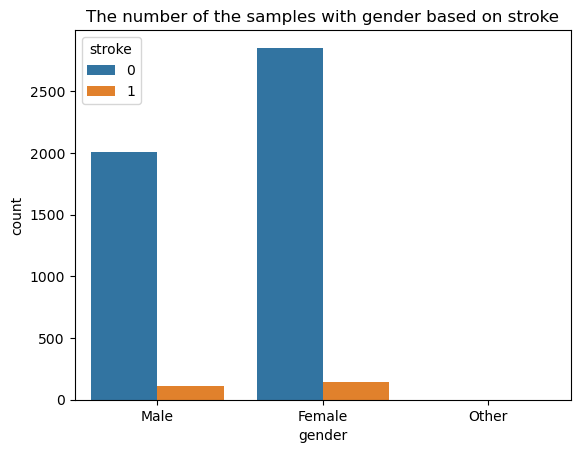

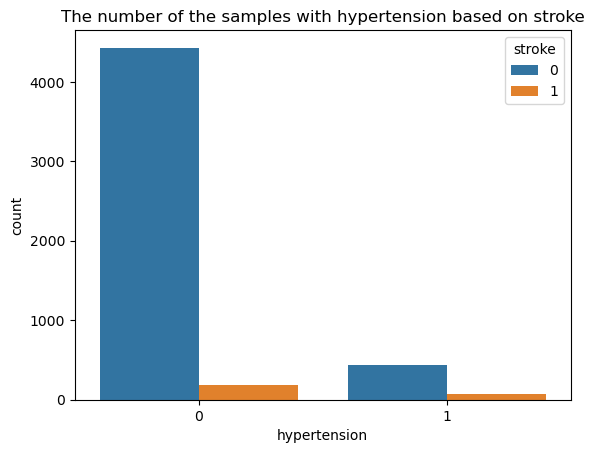

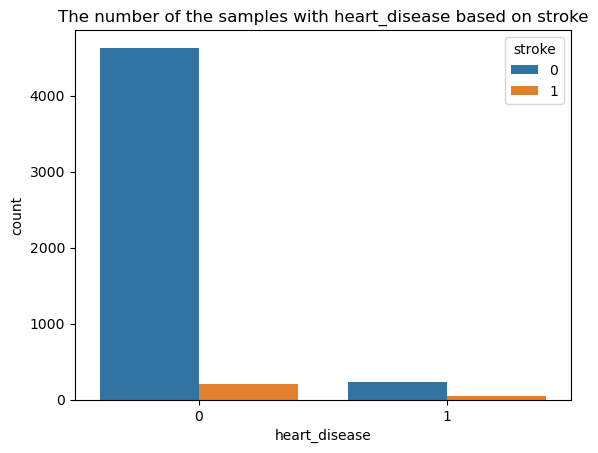

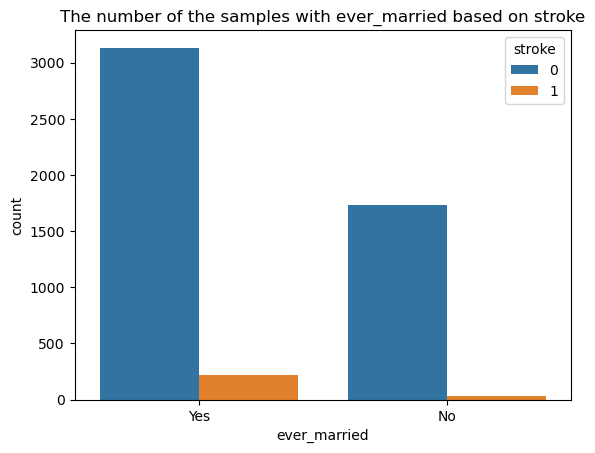

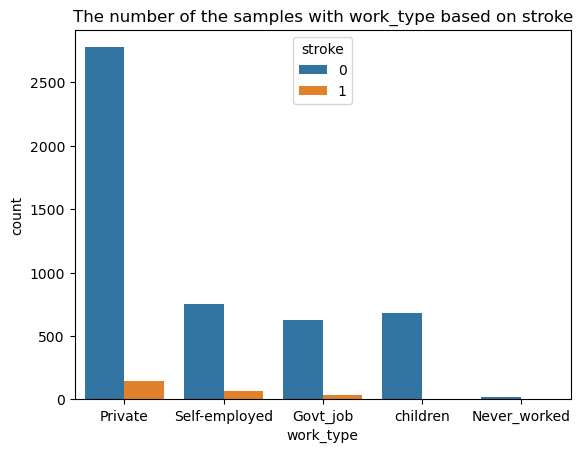

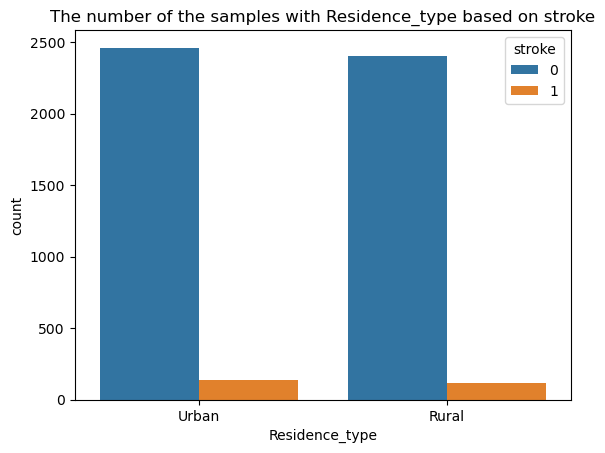

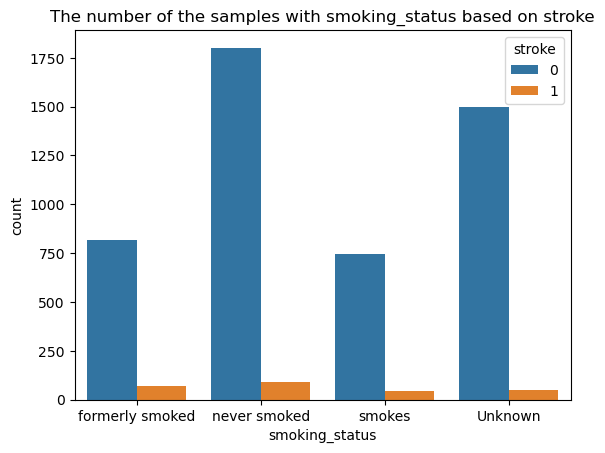

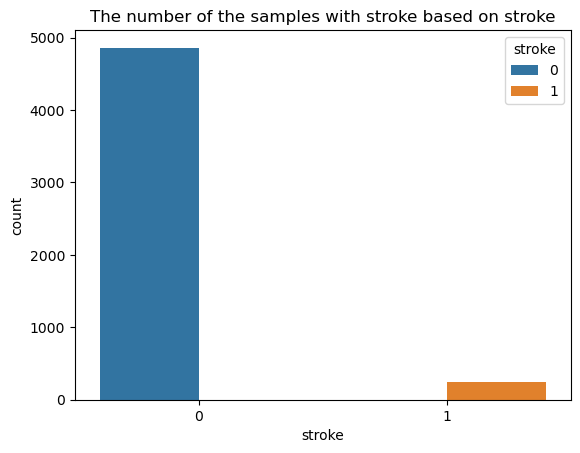

In [5]:
for i in strokeData.columns[1:]:
    if (strokeData[i].dtype =='object') or (strokeData[i].dtypes=='int64'):
        sns.countplot(data = strokeData, x = i,hue='stroke')
        plt.title('The number of the samples with {} based on stroke'.format(i))
        plt.show()

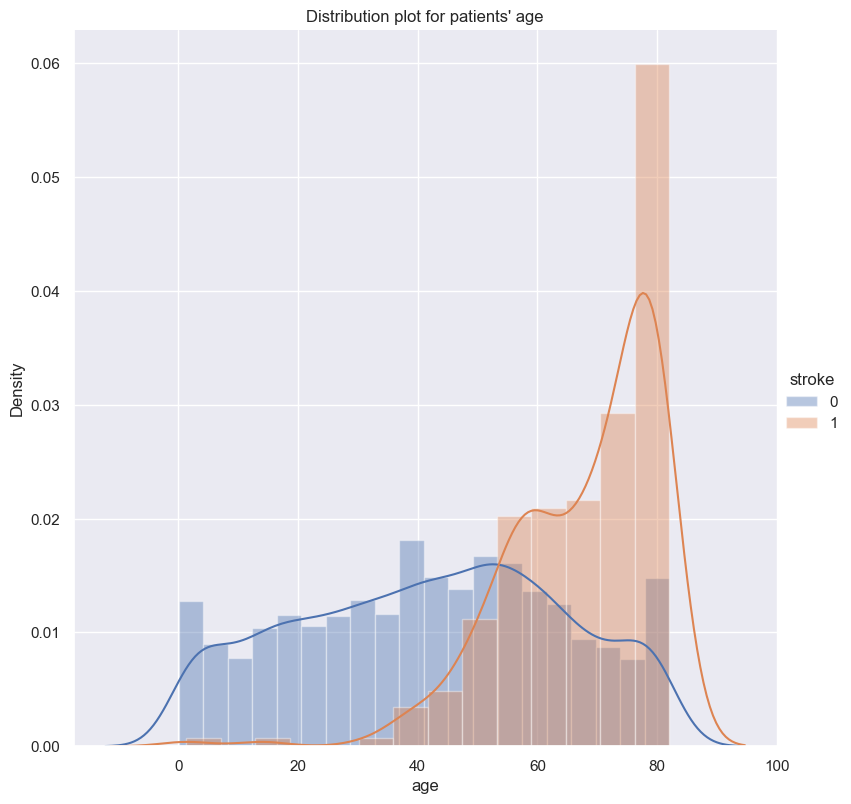

In [7]:
sns.set(rc={'figure.figsize':(18,10)})
sns.FacetGrid(strokeData, hue="stroke", height = 8).map(sns.distplot, "age").add_legend()
plt.title("Distribution plot for patients' age")
plt.show()

## The higher the age the more chances of having a stroke rises.

Text(0, 0.5, 'Age of Patient')

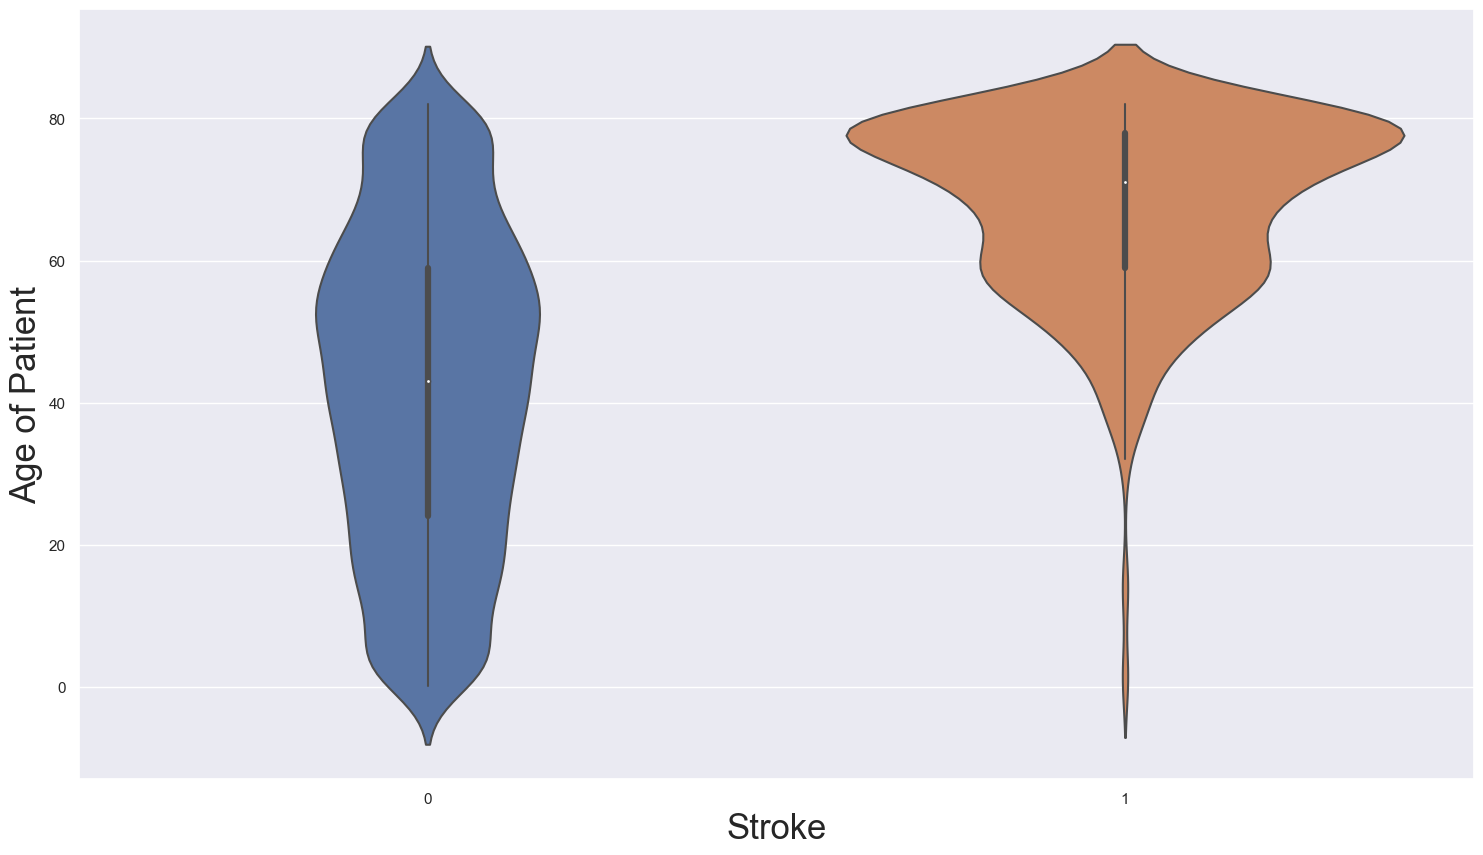

In [9]:
sns.set(rc={'figure.figsize':(18,10)})
seaborn_plot = sns.violinplot(x='stroke',y='age', data=strokeData)
seaborn_plot.set_xlabel("Stroke",fontsize=25)
seaborn_plot.set_ylabel("Age of Patient",fontsize=25)

#Number 5: the data set is imbalance because it only has a small percentage of people having stroked at ages from 70-80

## The chances of getting a stroke is at the highest when the patient's age is between 60-80. But the peak is like at 76.

Text(0.5, 1.0, 'Heatmap Correlation')

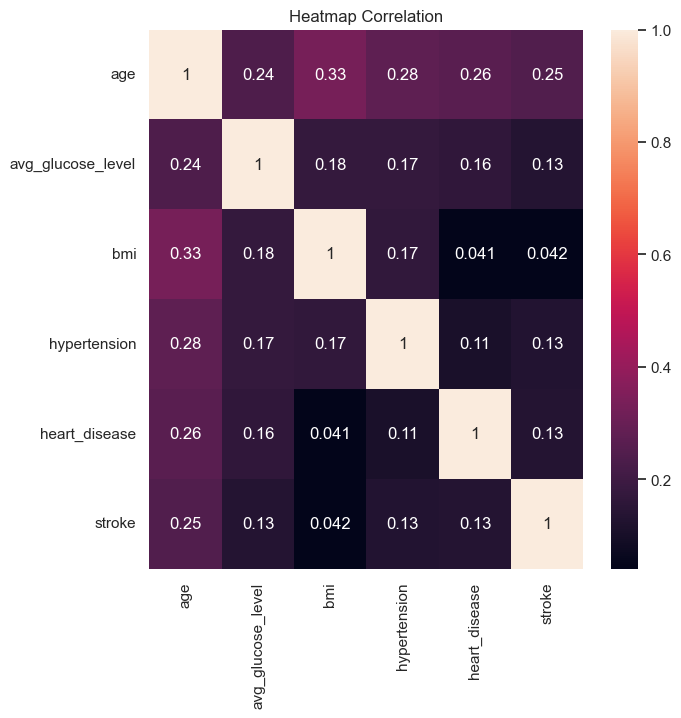

In [10]:
# Select the columns for the correlation matrix
selected_cols = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']
corr_data = strokeData[selected_cols].corr()

# Create the heatmap
fig, ax = plt.subplots(figsize=(7, 7))
heatmap = sns.heatmap(corr_data, vmax=1, annot=True)
heatmap.set_title('Heatmap Correlation')

In [12]:
strokeData[1:].corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003806,0.003467,-0.000233,0.001782,0.003352,0.007527
age,0.003806,1.000000,0.276498,0.263415,0.237810,0.333256,0.244843
hypertension,0.003467,0.276498,1.000000,0.108763,0.174775,0.167892,0.128435
heart_disease,-0.000233,0.263415,0.108763,1.000000,0.160030,0.040565,0.131772
avg_glucose_level,0.001782,0.237810,0.174775,0.160030,1.000000,0.175102,0.129946
bmi,0.003352,0.333256,0.167892,0.040565,0.175102,1.000000,0.041525
stroke,0.007527,0.244843,0.128435,0.131772,0.129946,0.041525,1.000000


Age and BMI shows the strongest correlation. So age and BMI can be a major role in people having a stroke.

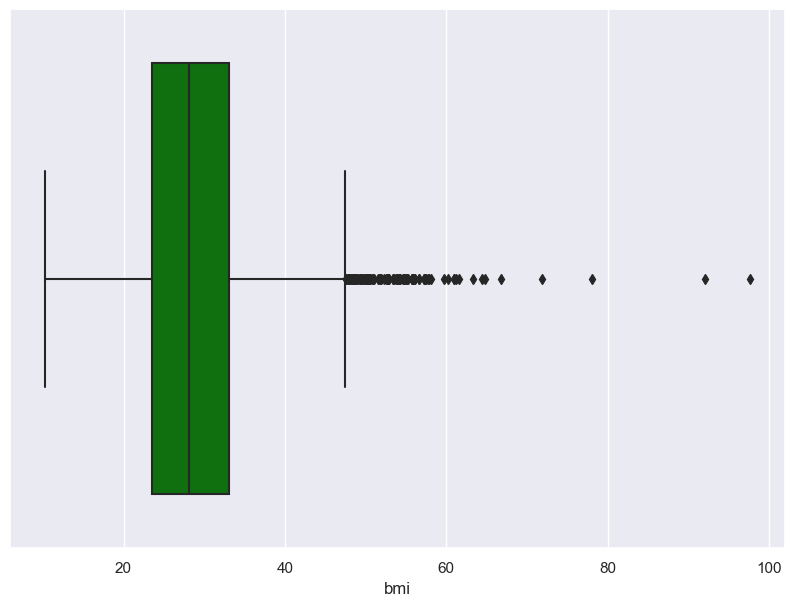

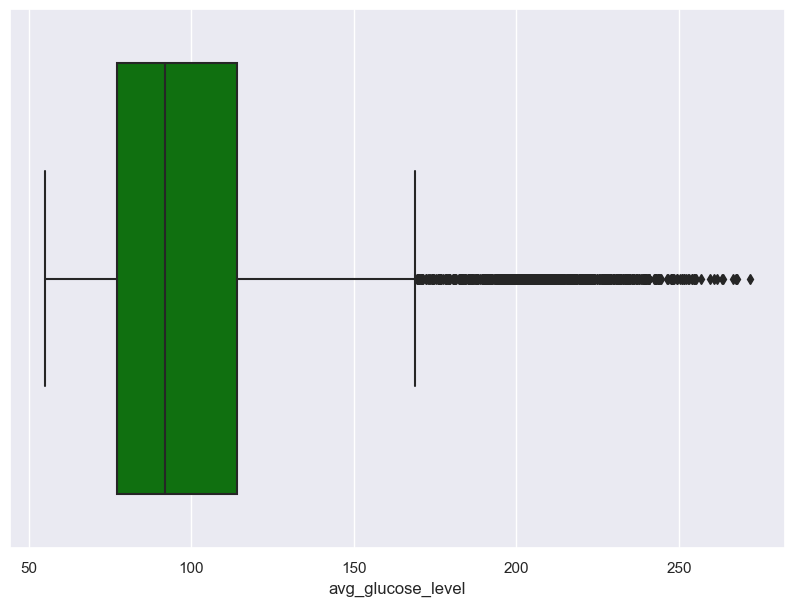

In [13]:
plt.figure(figsize=(10,7))
sns.boxplot(data=strokeData,x=strokeData["bmi"],color='green');


plt.figure(figsize=(10,7))
sns.boxplot(data=strokeData,x=strokeData["avg_glucose_level"],color='green');

In [14]:
bmi_outliers=strokeData.loc[strokeData['bmi']>50]
avg_glucose_level= strokeData.loc[strokeData['avg_glucose_level'] > 175]

strokeData["bmi"] = strokeData["bmi"].apply(lambda x: 50 if x>50 else x)
strokeData['avg_glucose_level']= strokeData['avg_glucose_level'].apply(lambda x: 175 if x > 175 else x)

In [15]:
strokeData.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [17]:
strokeData['bmi']=strokeData['bmi'].fillna(strokeData['bmi'].mean())

In [19]:
le=LabelEncoder()

for i in strokeData.columns[1:]:
    if(strokeData[i].dtype=='object'):
        strokeData[i]=le.fit_transform(strokeData[i])

In [20]:
strokeData.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,175.00,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,175.00,28.791465,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1


In [21]:
le.inverse_transform(strokeData['Residence_type'].unique())

array(['formerly smoked', 'Unknown'], dtype=object)